# Homework #1: Linear Regression

The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

1. Read in the dataset using sklearn's `load_boston()` function (found in sklearn.datasets) 

2. Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3. Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are. Remember, if our predictors are highly correlated, this is bad.

4. Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.  
Hint: `from sklearn.model_selection import train_test_split`  
Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

5. Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6. Compute, Mean-Square-Error (MSE) and R-Squared score of your Model  
Hint: `from sklearn.metrics import r2_score`  
Hint: `from sklearn.metrics import mean_squared_error`

7. Apply data normalization (scaling) to improve the prediction result  
Use `StandardScaler` and then train your Linear Regression Model. Compare the R-Square score with previous one you got  
Use `MinMaxScaler` and then train your Linear Regression Model. Compare the R-Square score with previous one you got  
Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

## Imports

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [82]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston

boston = load_boston()

# print(boston.data)
print(boston.data.shape)
print()

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos.head(10)

(506, 13)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT - percentage of the lower status of the population
- MEDV/PRICE - Median value of owner-occupied homes in \$1000's

Lets check out the distribution of prices for all the homes

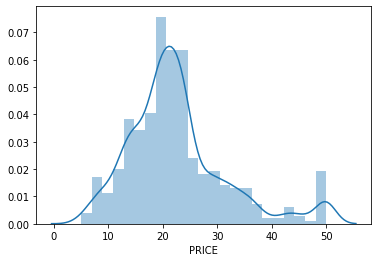

In [146]:
sns.distplot(bos['PRICE'])

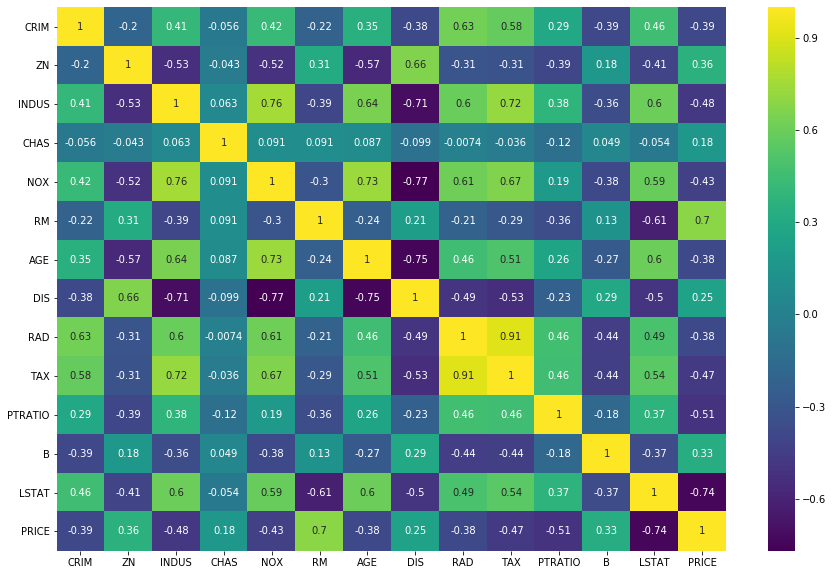

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(bos.corr(), cmap = 'viridis', annot=True)

Based on the correlation map, we can see that there's a strong positive correlation between `RM` and `PRICE` and a strong negative correlation between `LSTAT` and `PRICE`. Lets check out how they look in a graph. 

[Text(0, 0.5, "Median value of homes in $1000's"),
 Text(0.5, 0, 'percentage of the lower status of the population'),
 Text(0.5, 1.0, 'Lower class vs price')]

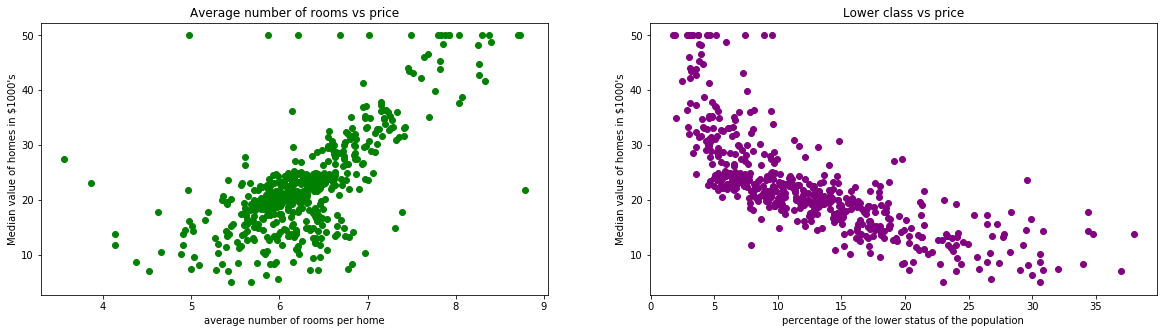

In [137]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(bos.RM, bos.PRICE, color='green')
ax.set(title='Average number of rooms vs price', xlabel='average number of rooms per home', ylabel='Median value of homes in $1000\'s')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(bos.LSTAT, bos.PRICE, color='purple')
ax2.set(title='Lower class vs price', xlabel='percentage of the lower status of the population', ylabel='Median value of homes in $1000\'s')

- As the number of rooms increases, the price of the home increases.
- As the percentage of the lower class population increases, the price of the home decreases. 

## Predictions



In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature_cols = ['RM', 'LSTAT']

# 75% of our data is use to train our model
# 25% is used to test
x_train, x_test, y_train, y_test = train_test_split(bos[feature_cols], bos.PRICE, test_size=0.25, random_state=0)

# Instantiate and train our Linear Regression 
price_reg = LinearRegression()
price_reg.fit(x_train, y_train)

print('Our linear regression model produced this equation that best fits our data')
print('----------------------------------------------------------------------------')
print(f'y = ({price_reg.coef_[0]} + {price_reg.coef_[1]})x + ({price_reg.intercept_})')

Our linear regression model produced this equation that best fits our data
----------------------------------------------------------------------------
y = (5.017853124274101 + -0.6745186902756269)x + (-0.604710743507745)


In [189]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = price_reg.predict(x_test)

print('This is how our model performed')
print('---------------------------------')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'MSE Score: {mean_squared_error(y_test, y_pred)}')

This is how our model performed
---------------------------------
R^2 Score: 0.5692445415835348
MSE Score: 35.19229684718286


## Data Normalization

### Min-Max Scale

In [205]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(bos[feature_cols])
y_minmax = min_max_scaler.fit_transform(np.array(bos.PRICE).reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x_minmax, y_minmax, test_size=0.25, random_state=0)

price_minmax_reg = LinearRegression()
price_minmax_reg.fit(x_train, y_train)

print('Our linear regression model produced this equation under Min-Max Normalization')
print('----------------------------------------------------------------------------')
print(f'y = ({price_minmax_reg.coef_[0][0]} + {price_minmax_reg.coef_[0][1]})x + ({price_minmax_reg.intercept_[0]})')

Our linear regression model produced this equation under Min-Max Normalization
----------------------------------------------------------------------------
y = (0.5819594545685889 + -0.5432123852353051)x + (0.24659881995234478)


In [185]:
y_pred = price_minmax_reg.predict(x_test)

print('This is how our model performed with Min-Max Normalization')
print('------------------------------------------------------------')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'MSE Score: {mean_squared_error(y_test, y_pred)}')

This is how our model performed with Min-Max Normalization
------------------------------------------------------------
R^2 Score: 0.5692445415835348
MSE Score: 0.017378912023300174


### Standard  Scale

In [206]:
standard_scaler = preprocessing.StandardScaler()
x_standard = min_max_scaler.fit_transform(bos[feature_cols])
y_standard = min_max_scaler.fit_transform(np.array(bos.PRICE).reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.25, random_state=0)

price_standard_reg = LinearRegression()
price_standard_reg.fit(x_train, y_train)

print('Our linear regression model produced this equation under Standard Normalization')
print('----------------------------------------------------------------------------')
print(f'y = ({price_minmax_reg.coef_[0][0]} + {price_standard_reg.coef_[0][1]})x + ({price_standard_reg.intercept_[0]})')

Our linear regression model produced this equation under Standard Normalization
----------------------------------------------------------------------------
y = (0.5819594545685889 + -0.5432123852353051)x + (0.24659881995234478)


In [186]:
y_pred = price_standard_reg.predict(x_test)

print('This is how our model performed with Min-Max Normalization')
print('------------------------------------------------------------')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'MSE Score: {mean_squared_error(y_test, y_pred)}')

This is how our model performed with Min-Max Normalization
------------------------------------------------------------
R^2 Score: 0.5692445415835348
MSE Score: 0.017378912023300174
